### Project Overview
### In this analysis of the 2023-24 NBA season, I evaluated players who are 25 years old or younger to identify the top 5 performers based on their recent performances. 

In [1]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats

from basketball_reference_web_scraper import client

### Understanding the data

In [2]:
#get all players 25 and under
data = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24').get_data_frames()[0]
u25 = data.loc[data['AGE'] <= 25.0].reset_index()
u25.head(5)

,index,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,0,1631260,AJ Green,AJ,1610612749,MIL,24.0,56,35,21,...,410,121,223,375,313,145,369,257,38,343
1,1,1631100,AJ Griffin,AJ,1610612737,ATL,20.0,20,8,12,...,451,121,77,519,450,396,480,257,38,469
2,2,1630639,AJ Lawson,AJ,1610612742,DAL,23.0,42,27,15,...,428,211,148,415,385,192,400,257,38,405
3,5,1630174,Aaron Nesmith,Aaron,1610612754,IND,24.0,72,41,31,...,61,499,568,103,117,79,133,190,38,133
4,6,1630598,Aaron Wiggins,Aaron,1610612760,OKC,25.0,78,55,23,...,219,421,336,248,202,117,222,257,38,218


In [4]:
print(f"The data has {u25.shape[0]} rows and {u25.shape[1]} columns")

The data has 297 rows and 67 columns


In [12]:
u25.describe()

,index,PLAYER_ID,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,FGM,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
count,297.000000,2.970000e+02,2.970000e+02,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,285.703704,1.632683e+06,1.610613e+09,22.949495,41.451178,19.074074,22.377104,0.454714,873.732183,150.693603,...,302.164983,262.410774,256.218855,308.585859,314.932660,321.114478,318.121212,202.804714,36.949495,317.713805
std,166.847640,4.573382e+03,8.982091e+00,1.650391,25.861869,15.399672,15.493652,0.223367,802.616072,168.762819,...,161.262637,175.029745,168.094033,160.721831,162.151629,152.718498,162.492720,76.766113,5.203378,162.211768
min,0.000000,1.628373e+06,1.610613e+09,19.000000,1.000000,0.000000,0.000000,0.000000,0.666667,0.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.000000,1.000000
25%,146.000000,1.630188e+06,1.610613e+09,22.000000,17.000000,6.000000,9.000000,0.261000,121.788333,18.000000,...,160.000000,121.000000,111.000000,176.000000,184.000000,196.000000,183.000000,157.000000,38.000000,188.000000
50%,275.000000,1.630618e+06,1.610613e+09,23.000000,43.000000,15.000000,22.000000,0.500000,607.688333,83.000000,...,319.000000,263.000000,237.000000,331.000000,328.000000,327.000000,337.000000,257.000000,38.000000,334.000000
75%,431.000000,1.631243e+06,1.610613e+09,24.000000,64.000000,30.000000,32.000000,0.600000,1538.390000,234.000000,...,451.000000,413.000000,390.000000,446.000000,453.000000,451.000000,460.000000,257.000000,38.000000,461.000000
max,571.000000,1.642013e+06,1.610613e+09,25.000000,82.000000,57.000000,65.000000,1.000000,2881.356667,804.000000,...,520.000000,571.000000,570.000000,547.000000,563.000000,570.000000,568.000000,257.000000,38.000000,568.000000


In [9]:
u25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  297 non-null    int64  
 1   PLAYER_ID              297 non-null    int64  
 2   PLAYER_NAME            297 non-null    object 
 3   NICKNAME               297 non-null    object 
 4   TEAM_ID                297 non-null    int64  
 5   TEAM_ABBREVIATION      297 non-null    object 
 6   AGE                    297 non-null    float64
 7   GP                     297 non-null    int64  
 8   W                      297 non-null    int64  
 9   L                      297 non-null    int64  
 10  W_PCT                  297 non-null    float64
 11  MIN                    297 non-null    float64
 12  FGM                    297 non-null    int64  
 13  FGA                    297 non-null    int64  
 14  FG_PCT                 297 non-null    float64
 15  FG3M  

In [13]:
u25.columns

Index(['index', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK'],
      dtype='object')

# EDA

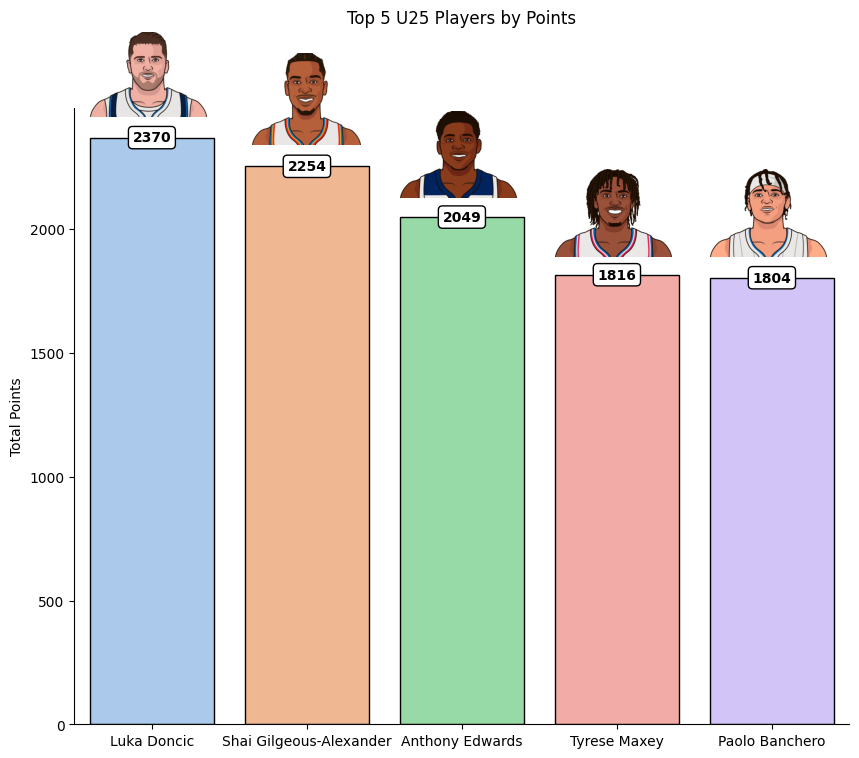

In [453]:
top5 = u25.sort_values('PTS', ascending=False)[:5]

plt.figure(figsize=(10,8))
bar_plot = sns.barplot(data=top5, x='PLAYER_NAME', y='PTS', hue='PLAYER_NAME', palette='pastel', edgecolor='black', dodge=False, legend=False)

plt.title('Top 5 U25 Players by Points')
plt.ylabel('Total Points')
plt.xlabel('')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in ax.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  
    bar_height = bar.get_height()
    bar_width = bar.get_width()
    
    ax.text(bar_x, bar_height, f'{int(bar_height)}', ha='center', va='center', color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
img = mpimg.imread('nba_pic/luka.jpg')
imagebox = plt.gca().inset_axes([.02, .98, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/shai.jpg')
imagebox = plt.gca().inset_axes([0.225, .94, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/anthony.jpg')
imagebox = plt.gca().inset_axes([0.42, .85, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/tyrese.jpg')
imagebox = plt.gca().inset_axes([0.620, .755, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/paolo.jpg')
imagebox = plt.gca().inset_axes([0.82, .755, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

plt.show()

Inference
- Three players ended the 2023-24 season with 2,000 or more points. There was only 7 people this season to put up 2k season points.

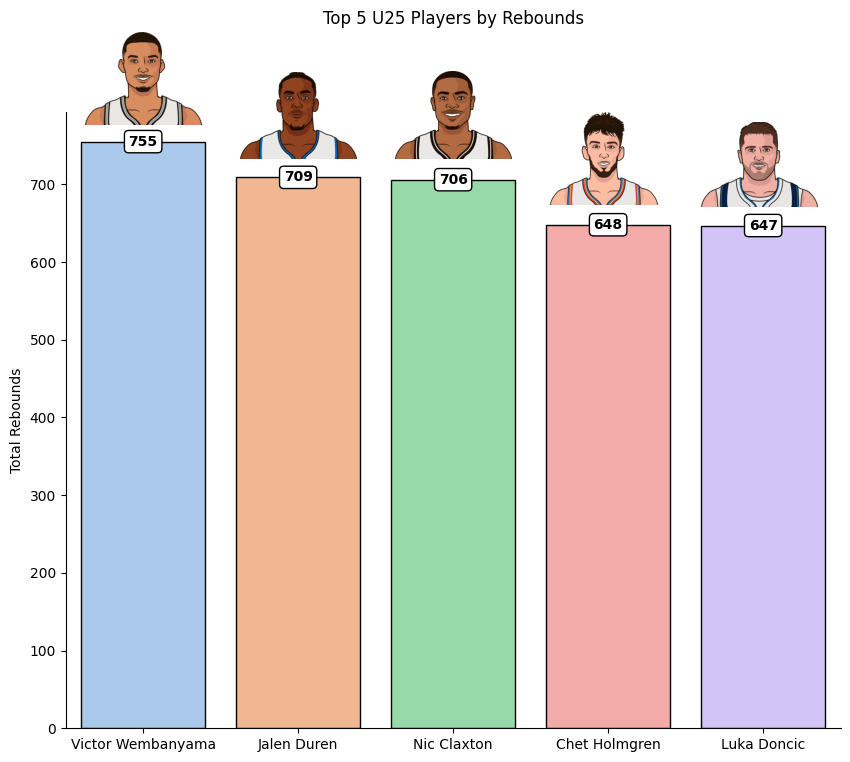

In [454]:
top5 = u25.sort_values('REB', ascending=False)[:5]

plt.figure(figsize=(10,8))
bar_plot = sns.barplot(data=top5, x='PLAYER_NAME', y='REB', hue='PLAYER_NAME', palette='pastel', edgecolor='black', dodge=False, legend=False)

plt.title('Top 5 U25 Players by Rebounds')
plt.ylabel('Total Rebounds')
plt.xlabel('')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in ax.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  
    bar_height = bar.get_height()
    ax.text(bar_x, bar_height, f'{int(bar_height)}', ha='center', va='center', color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
img = mpimg.imread('nba_pic/victor.jpg')
imagebox = plt.gca().inset_axes([0.025, .98, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/jalen.jpg')
imagebox = plt.gca().inset_axes([0.225, .92, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/nic.jpg')
imagebox = plt.gca().inset_axes([0.425, .92, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/chet.jpg')
imagebox = plt.gca().inset_axes([0.62, .85, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/luka.jpg')
imagebox = plt.gca().inset_axes([0.82, .84, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

plt.show()

Inference:
- Luka Doncic ranked among the top 5 rebounders for players 25 and under this season, finishing just one rebound shy of Chet Holmgren, who stands at 7'1".
- As expected, Victor was among the top performers due to his height advantage.



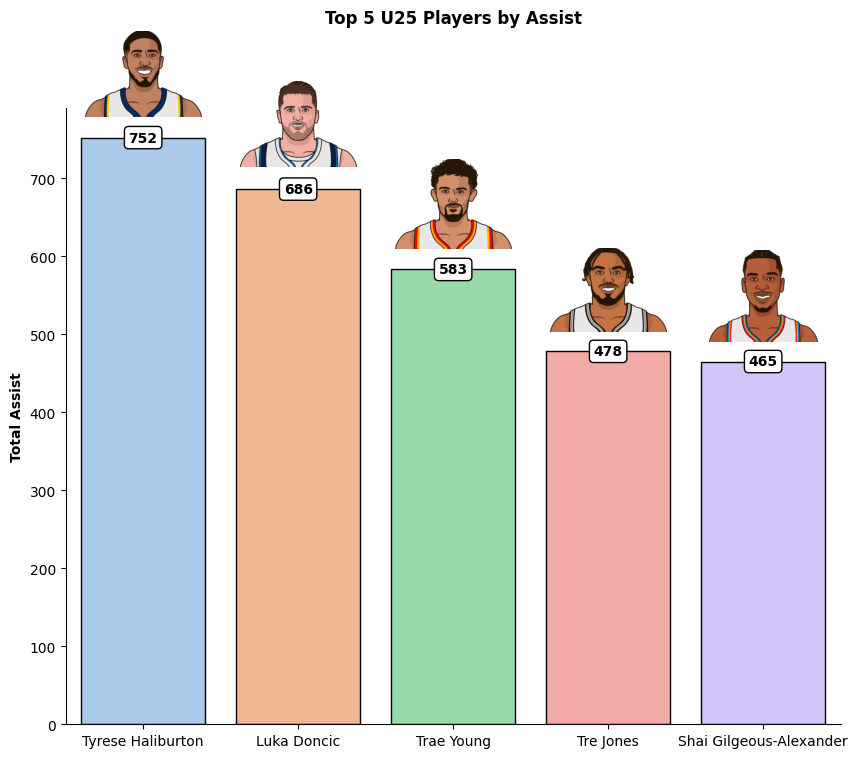

In [455]:
top5 = u25.sort_values('AST', ascending=False)[:5]

plt.figure(figsize=(10,8))
bar_plot = sns.barplot(data=top5, x='PLAYER_NAME', y='AST', hue='PLAYER_NAME', palette='pastel', edgecolor='black', dodge=False, legend=False)

plt.title('Top 5 U25 Players by Assist', weight='bold')
plt.ylabel('Total Assist', weight='bold')
plt.xlabel('')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in ax.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  
    bar_height = bar.get_height()
    ax.text(bar_x, bar_height, f'{int(bar_height)}', ha='center', va='center', color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
img = mpimg.imread('nba_pic/haliburton.jpg')
imagebox = plt.gca().inset_axes([0.025, .98, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/luka.jpg')
imagebox = plt.gca().inset_axes([0.225, .9, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/trae.jpg')
imagebox = plt.gca().inset_axes([0.425, .77, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/tre.jpg')
imagebox = plt.gca().inset_axes([0.625, .63, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/shai.jpg')
imagebox = plt.gca().inset_axes([0.825, .62, 0.15, 0.15])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

plt.show()

Inference:
- Tyrese Haliburton led the entire league in assists, averaging 10.9 per game.
- Shai also showning his ablity to pass, with cracking the top 5 for under 25.
- Luka was among the top 5 in points, assists, and rebounds across the entire NBA this season.

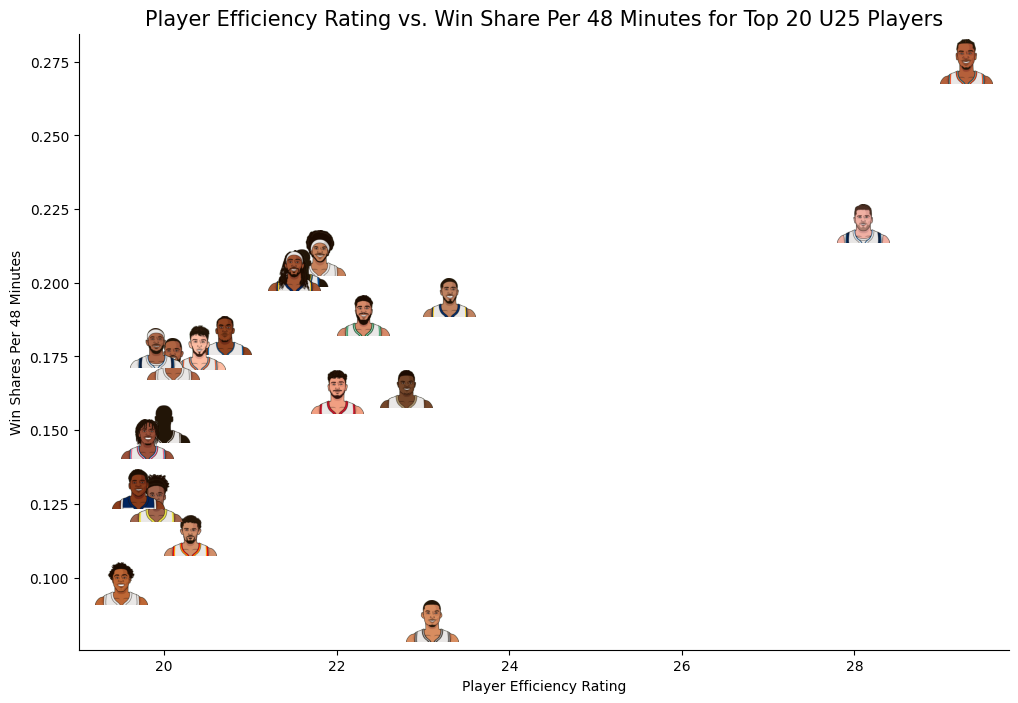

In [456]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

nba_pic = {'Shai Gilgeous-Alexander': 'nba_pic/shai.jpg',
        'Luka Dončić': 'nba_pic/luka.jpg',
        'Tyrese Haliburton': 'nba_pic/haliburton.jpg',
        'Victor Wembanyama': 'nba_pic/victor.jpg',
        'Zion Williamson': 'nba_pic/zion.jpg',
        'Jayson Tatum': 'nba_pic/jayson.jpg',
        'Alperen Sengun': 'nba_pic/alperen.jpg',
        'Jarrett Allen': 'nba_pic/jarrett.jpg',
        'Trayce Jackson-Davis': 'nba_pic/trayce.jpg',
        'Isaiah Jackson': 'nba_pic/isaiah.jpg',
        'Jalen Smith': 'nba_pic/jalen.jpg',
        'Evan Mobley': 'nba_pic/evan.jpg',
        "Day'Ron Sharpe": 'nba_pic/dayron.jpg',
        "Chet Holmgren": 'nba_pic/chet.jpg',
        'Trae Young': 'nba_pic/trae.jpg',
        'Daniel Gafford': 'nba_pic/daniel.jpg',
        'Collin Sexton': 'nba_pic/collin.jpg',
        'Tyrese Maxey': 'nba_pic/tyrese.jpg',
        'Anthony Edwards': 'nba_pic/anthony.jpg',
        'Scottie Barnes': 'nba_pic/scottie.jpg'
        }

df = pd.DataFrame(client.players_advanced_season_totals(season_end_year=2024))
u25_adv = df.loc[(df['age'] <= 25) & (df['games_played'] >= 40)].reset_index()
per_ws = u25_adv.sort_values(['player_efficiency_rating', 'win_shares_per_48_minutes'],ascending=False)[:20]

plt.figure(figsize=(12,8))
scatter = sns.scatterplot(data=per_ws, x='player_efficiency_rating', y='win_shares_per_48_minutes', hue='player_efficiency_rating', edgecolor='black' ,palette='bright', legend=False)

plt.title('Player Efficiency Rating vs. Win Share Per 48 Minutes for Top 20 U25 Players', size='15')
plt.xlabel('Player Efficiency Rating')
plt.ylabel('Win Shares Per 48 Minutes')

# Add images to scatter plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def get_image(path):
    return OffsetImage(mpimg.imread(path), zoom=0.05, resample=True, clip_path=None)

for i, row in per_ws.iterrows():
    player_name = row['name']
    img_path = nba_pic[player_name]
    img = get_image(img_path)
    ab = AnnotationBbox(img, (row['player_efficiency_rating'], row['win_shares_per_48_minutes']), frameon=False, pad=0.3)
    ax.add_artist(ab)

plt.show()

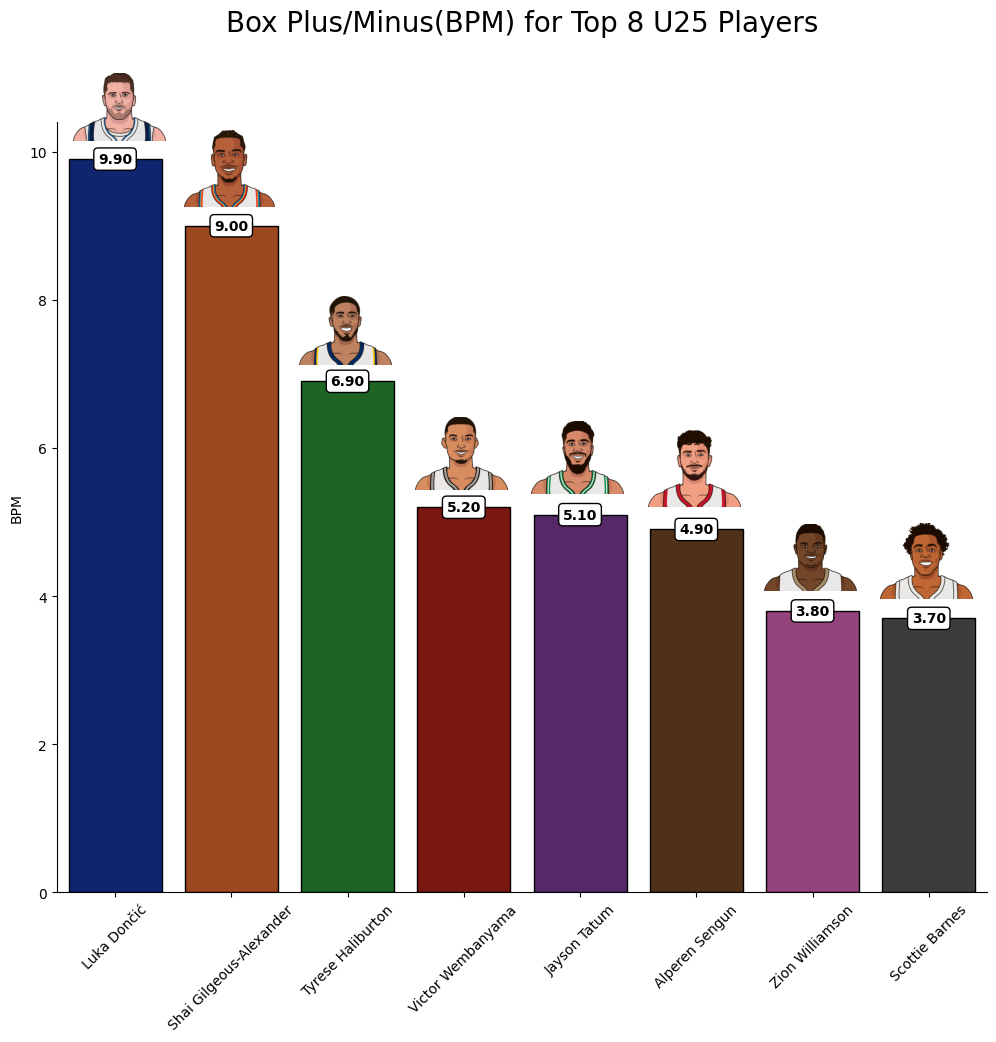

In [457]:
bpm = u25_adv.sort_values('box_plus_minus', ascending=False)[:8]

plt.figure(figsize=(12,10))
sns.barplot(data=bpm, x='name', y='box_plus_minus',hue='name', palette='dark', edgecolor='black', dodge=False, legend=False)

plt.title("Box Plus/Minus(BPM) for Top 8 U25 Players",pad=30, size=20)
plt.ylabel("BPM")
plt.xlabel('')
plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in ax.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  
    bar_height = bar.get_height()
    ax.text(bar_x, bar_height, f'{bar_height:.2f}', ha='center', va='center', color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
img = mpimg.imread('nba_pic/luka.jpg')
imagebox = plt.gca().inset_axes([0.017, .97, 0.10, 0.10])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/shai.jpg')
imagebox = plt.gca().inset_axes([0.135, .89, 0.10, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/haliburton.jpg')
imagebox = plt.gca().inset_axes([0.26, .68, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/victor.jpg')
imagebox = plt.gca().inset_axes([0.385, .52, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/jayson.jpg')
imagebox = plt.gca().inset_axes([0.51, .515, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')

img = mpimg.imread('nba_pic/alperen.jpg')
imagebox = plt.gca().inset_axes([0.635, .5, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')


img = mpimg.imread('nba_pic/zion.jpg')
imagebox = plt.gca().inset_axes([0.76, .385, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')


img = mpimg.imread('nba_pic/scottie.jpg')
imagebox = plt.gca().inset_axes([0.885, .38, 0.1, 0.1])  # [x, y, width, height] in figure coordinates
imagebox.imshow(img)
imagebox.axis('off')
plt.show()


We can see Luka and Shai having a huge leap in bpm over 3rd place.

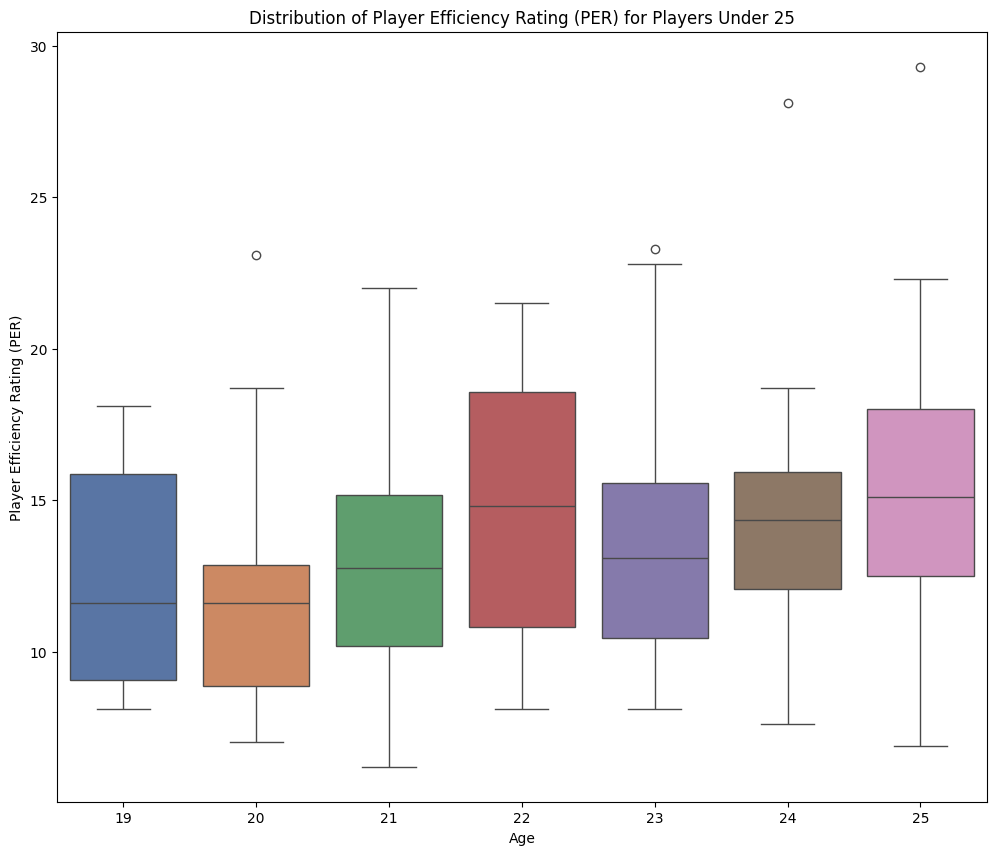

In [458]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=u25_adv, x='age', y='player_efficiency_rating', palette='deep', hue='age', legend=False)

# Add title and labels
plt.title('Distribution of Player Efficiency Rating (PER) for Players Under 25')
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating (PER)')

plt.show()

We can see players at the age of 22 have the highest player efficiency rating average. 

In [459]:
advanced_df = leaguedashplayerstats.LeagueDashPlayerStats(
season='2023-24',
per_mode_detailed='PerGame',
measure_type_detailed_defense='Advanced'
).get_data_frames()[0]

advanced_df = advanced_df.loc[(advanced_df['AGE'] <= 25.0) & (advanced_df['GP'] >= 40)]

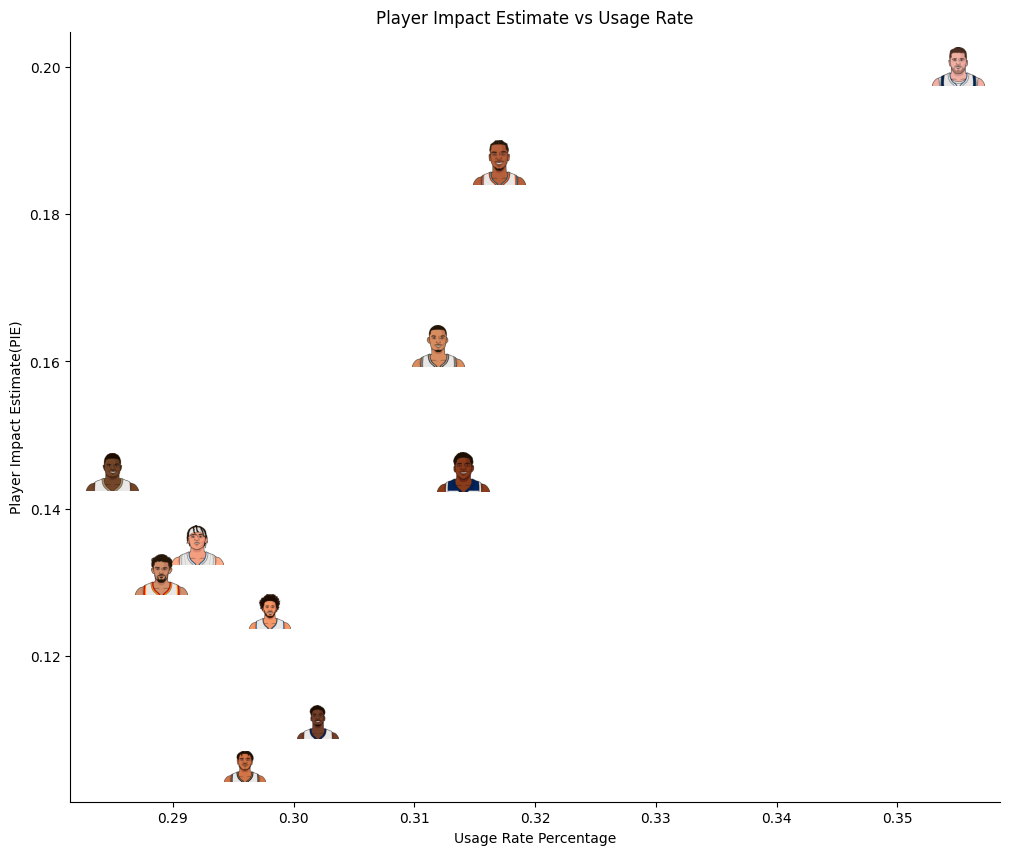

In [468]:
pie = advanced_df.sort_values(['USG_PCT','PIE'], ascending=False)[:10]

nba_pic = {'Shai': 'nba_pic/shai.jpg',
        'Luka': 'nba_pic/luka.jpg',
        'Tyrese': 'nba_pic/haliburton.jpg',
        'Victor': 'nba_pic/victor.jpg',
        'Zion': 'nba_pic/zion.jpg',
        'Jayson': 'nba_pic/jayson.jpg',
        'Alperen': 'nba_pic/alperen.jpg',
        'Anthony': 'nba_pic/anthony.jpg',
        'Deandre': 'nba_pic/deandre.jpg',
        'Jalen': 'nba_pic/jalen.jpg',
        'Evan': 'nba_pic/evan.jpg',
        'Jaren': 'nba_pic/jaren.jpg',
        'Cade': 'nba_pic/cade.jpg',
        'Paolo': 'nba_pic/paolo.jpg',
        'Trae': 'nba_pic/trae.jpg',
        'Zion': 'nba_pic/zion.jpg',
        'Cam': 'nba_pic/cam.jpg'
        }

plt.figure(figsize=(12,10))
sns.scatterplot(data=pie, y='PIE', x='USG_PCT')

plt.title('Player Impact Estimate vs Usage Rate')
plt.ylabel('Player Impact Estimate(PIE)')
plt.xlabel('Usage Rate Percentage')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def get_image(path):
    return OffsetImage(mpimg.imread(path), zoom=0.05, resample=True, clip_path=None)

for i, row in pie.iterrows():
    player_name = row['NICKNAME']
    img_path = nba_pic[player_name]
    img = get_image(img_path)
    ab = AnnotationBbox(img, (row['USG_PCT'], row['PIE']), frameon=False, pad=0.3)
    ax.add_artist(ab)

plt.show()

### Based on the data, we can say that the top three players for the 2023-24 season were Luka Dončić, Shai Gilgeous-Alexander, and Victor Wembanyama. Despite not having a winning season, Wembanyama showcased his immense potential and demonstrated how great he can be in just his rookie year.

### The other two players I would add to the top 5 list are Tyrese Haliburton and Anthony Edwards, both of whom have shown remarkable growth and standout performances this season, solidifying their places among the league's elite.

### Top 5 25 and under for 2023-24 season
### 1. Luka
### 2. Shai
### 3. Tyrese
### 4. Anthony 
### 5. Wemby